In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import numpy as np

1. Load The Dataset

In [2]:
# Load the dataset into a Pandas DataFrame
df = pd.read_csv("onlinefoods.csv")

# Display the first few rows of the DataFrame to verify that it has been loaded correctly
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


# 2. Handle Missing Values

In [3]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Handle missing values
# If there are missing values, decide on an appropriate strategy (e.g., imputation or removal)
# For demonstration, let's assume we'll use mean imputation for numerical features and mode imputation for categorical features

# Impute missing values for numerical features with mean
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_features] = df[numerical_features].fillna(df[numerical_features].mean())

# Impute missing values for categorical features with mode
categorical_features = df.select_dtypes(include=['object']).columns
df[categorical_features] = df[categorical_features].fillna(df[categorical_features].mode().iloc[0])

# Check if there are any missing values remaining
missing_values_after = df.isnull().sum()
print("\nMissing Values after handling:\n", missing_values_after)


Missing Values:
 Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
Unnamed: 12                   0
dtype: int64

Missing Values after handling:
 Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
Unnamed: 12                   0
dtype: int64


# 3. Encode Categorial Variables

In [4]:
# One-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Alternatively, you can use label encoding for ordinal categorical variables
# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()
# df['categorical_column'] = label_encoder.fit_transform(df['categorical_column'])

# Display the encoded DataFrame
print(df_encoded.head())


   Age  Family size  latitude  longitude  Pin code  Gender_Male  \
0   20            4   12.9766    77.5993    560001            0   
1   24            3   12.9770    77.5773    560009            0   
2   22            3   12.9551    77.6593    560017            1   
3   22            6   12.9473    77.5616    560019            0   
4   22            4   12.9850    77.5533    560010            1   

   Marital Status_Prefer not to say  Marital Status_Single  \
0                                 0                      1   
1                                 0                      1   
2                                 0                      1   
3                                 0                      1   
4                                 0                      1   

   Occupation_House wife  Occupation_Self Employeed  ...  \
0                      0                          0  ...   
1                      0                          0  ...   
2                      0                    

# 4. Feature Selection

Summary Statistics:
               Age  Family size    latitude   longitude       Pin code
count  388.000000   388.000000  388.000000  388.000000     388.000000
mean    24.628866     3.280928   12.972058   77.600160  560040.113402
std      2.975593     1.351025    0.044489    0.051354      31.399609
min     18.000000     1.000000   12.865200   77.484200  560001.000000
25%     23.000000     2.000000   12.936900   77.565275  560010.750000
50%     24.000000     3.000000   12.977000   77.592100  560033.500000
75%     26.000000     4.000000   12.997025   77.630900  560068.000000
max     33.000000     6.000000   13.102000   77.758200  560109.000000

Correlation Matrix:
                   Age  Family size  latitude  longitude  Pin code
Age          1.000000     0.169982  0.006595   0.047500  0.137294
Family size  0.169982     1.000000 -0.053537   0.070126 -0.009402
latitude     0.006595    -0.053537  1.000000  -0.144234 -0.201813
longitude    0.047500     0.070126 -0.144234   1.000000  0.1561

<ipython-input-5-a40a4a15eb0c>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print("\nCorrelation Matrix:\n", df.corr())


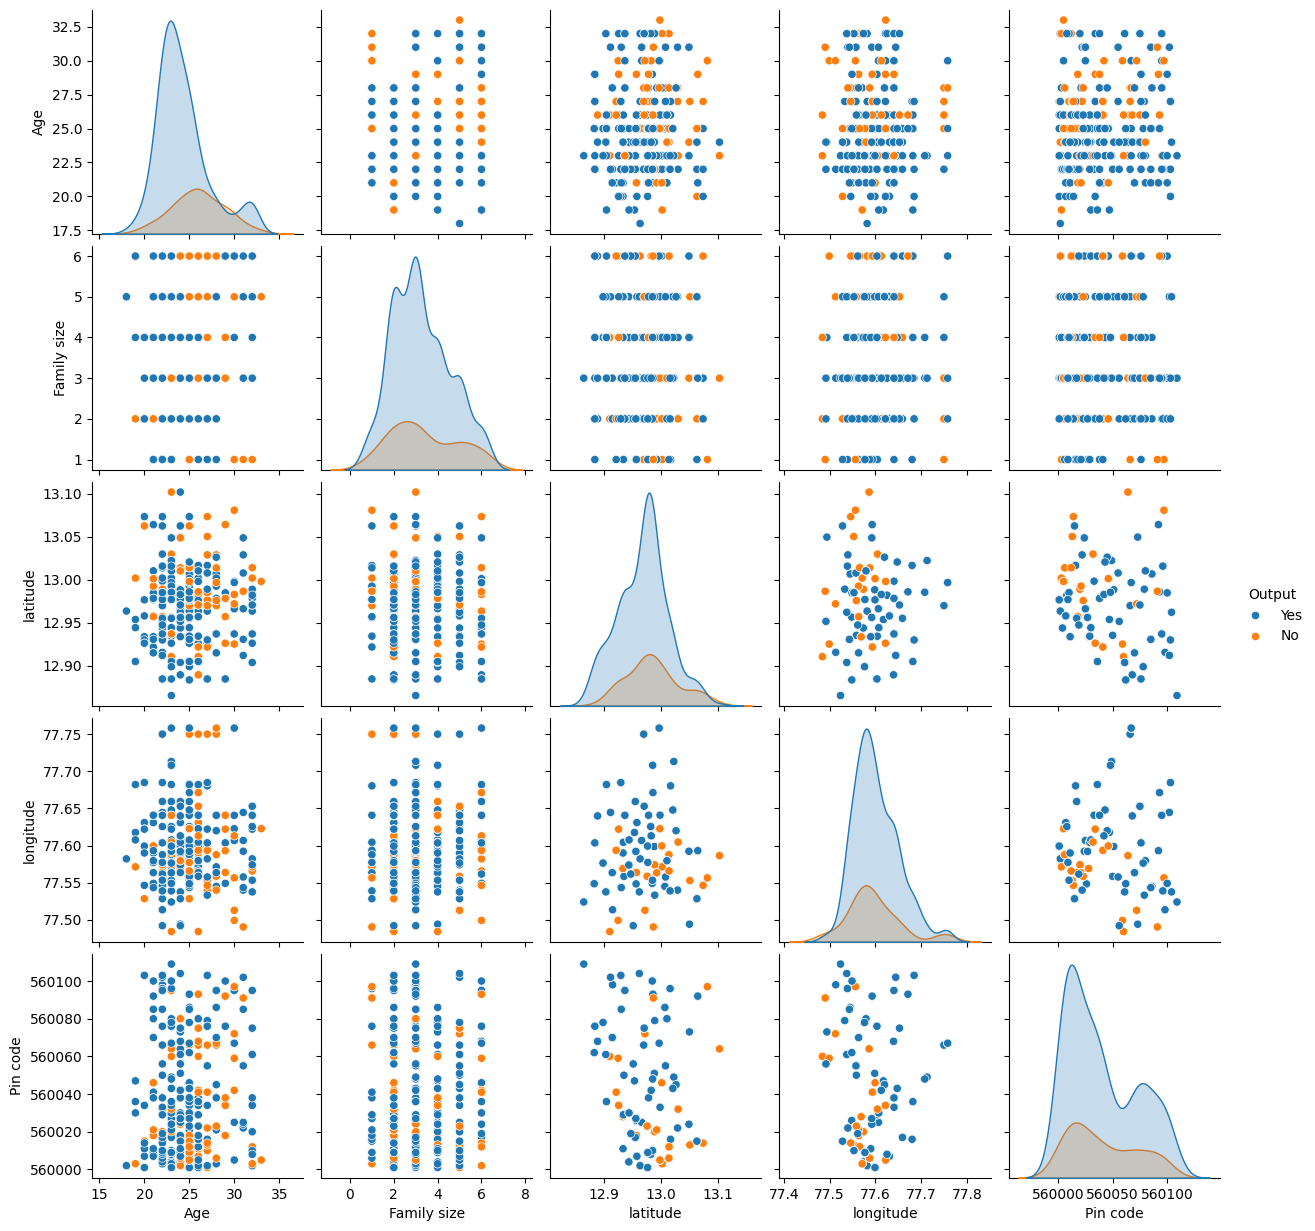

Selected Features:
    Age  Gender Marital Status Occupation  Monthly Income  \
0   20  Female         Single    Student       No Income   
1   24  Female         Single    Student  Below Rs.10000   
2   22    Male         Single    Student  Below Rs.10000   
3   22  Female         Single    Student       No Income   
4   22    Male         Single    Student  Below Rs.10000   

  Educational Qualifications  Family size  
0              Post Graduate            4  
1                   Graduate            3  
2              Post Graduate            3  
3                   Graduate            6  
4              Post Graduate            4  


In [5]:
# Perform preliminary analysis and explore the dataset to identify potentially relevant features
# For example, you can use correlation analysis, visualization techniques, or domain knowledge to understand the relationship between features and the target variable

# Display summary statistics and correlation matrix
print("Summary Statistics:\n", df.describe())
print("\nCorrelation Matrix:\n", df.corr())

# Visualize relationships between features and the target variable
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Pairplot
sns.pairplot(df, hue='Output')
plt.show()

# Based on the preliminary analysis, select features that have a significant correlation with the target variable or are likely to be relevant based on domain knowledge

# Example: Select relevant features
selected_features = ['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income', 'Educational Qualifications', 'Family size']

# Create a new DataFrame with selected features
df_selected = df[selected_features]

# Display the DataFrame with selected features
print("Selected Features:\n", df_selected.head())


# Part 2 : EDA
1. Descriptive Statistics

In [6]:
# Use .describe() to summarize the numeric columns
numeric_summary = df.describe()

# Display the summary statistics
print("Descriptive Statistics for Numeric Columns:\n", numeric_summary)

# Highlight any interesting findings
# For example, you can look for unusual values, large standard deviations, or significant differences between mean and median
# You can also identify potential outliers or skewed distributions

# Additional analysis or visualization can also be performed to further explore the data and validate the findings


Descriptive Statistics for Numeric Columns:
               Age  Family size    latitude   longitude       Pin code
count  388.000000   388.000000  388.000000  388.000000     388.000000
mean    24.628866     3.280928   12.972058   77.600160  560040.113402
std      2.975593     1.351025    0.044489    0.051354      31.399609
min     18.000000     1.000000   12.865200   77.484200  560001.000000
25%     23.000000     2.000000   12.936900   77.565275  560010.750000
50%     24.000000     3.000000   12.977000   77.592100  560033.500000
75%     26.000000     4.000000   12.997025   77.630900  560068.000000
max     33.000000     6.000000   13.102000   77.758200  560109.000000


# 2. Visualizations

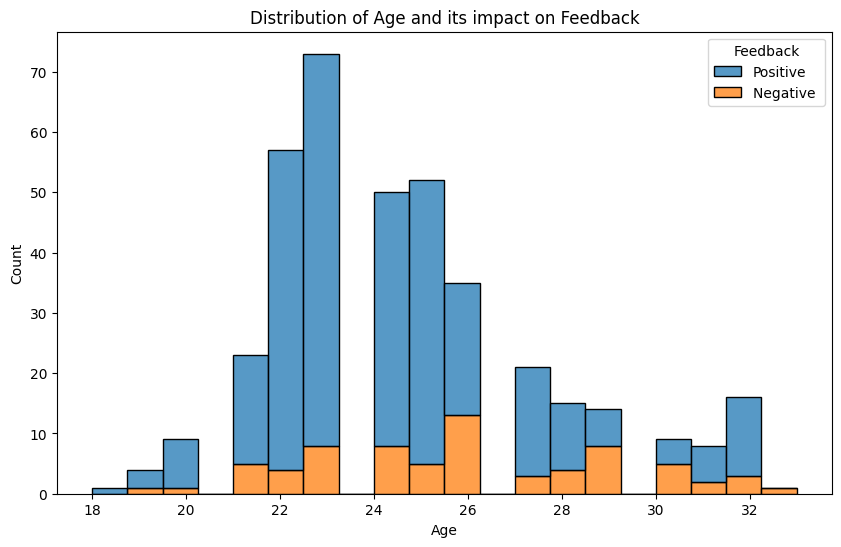

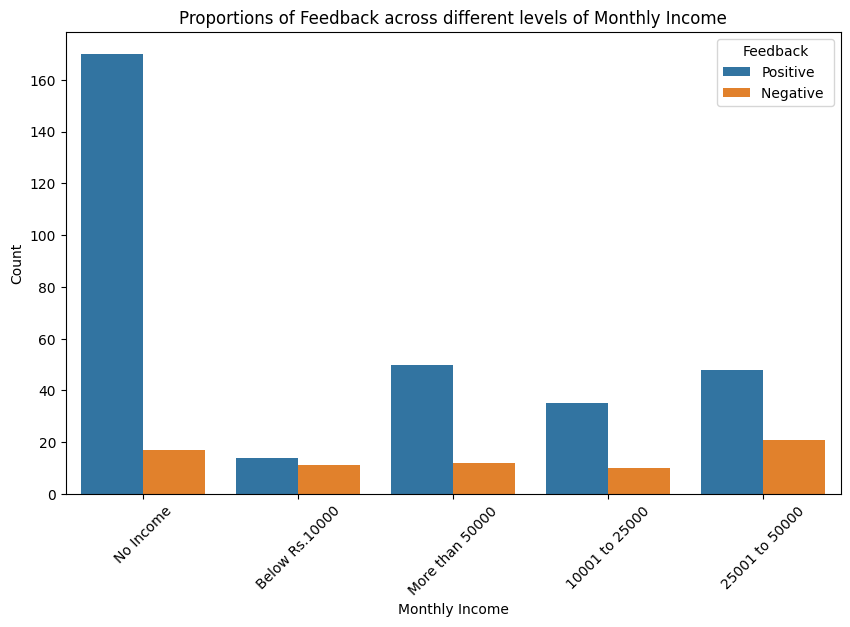

<ipython-input-8-36a047d0452a>:21: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)


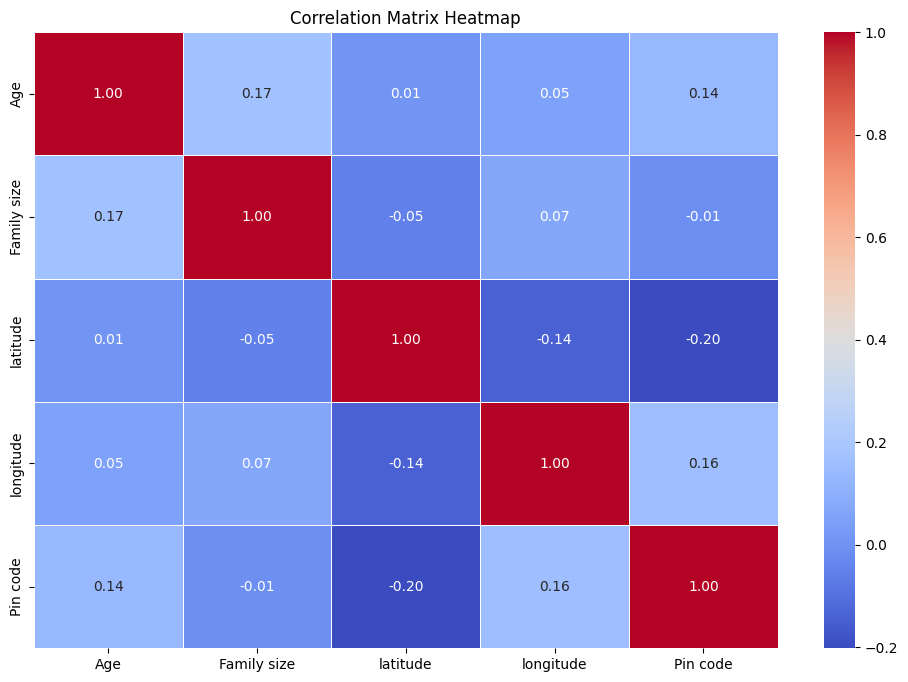

In [8]:
# Distribution of Age and its impact on Feedback
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Feedback', multiple='stack', bins=20)
plt.title('Distribution of Age and its impact on Feedback')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Proportions of Feedback across different levels of Monthly Income
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Monthly Income', hue='Feedback')
plt.title('Proportions of Feedback across different levels of Monthly Income')
plt.xlabel('Monthly Income')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Feedback')
plt.show()

# Correlation matrix heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


# Part 3: Logistic Regression Model
1. Build The Model

In [18]:
# Perform one-hot encoding for categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Split the encoded data into training and test sets
X_train_encoded, X_test_encoded, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
logistic_model = LogisticRegression()

# Train the logistic regression model on the training set
logistic_model.fit(X_train_encoded, y_train)

# Predictions on the test set
y_pred = logistic_model.predict(X_test_encoded)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8589743589743589

Classification Report:
              precision    recall  f1-score   support

   Negative        0.00      0.00      0.00        11
    Positive       0.86      1.00      0.92        67

    accuracy                           0.86        78
   macro avg       0.43      0.50      0.46        78
weighted avg       0.74      0.86      0.79        78


Confusion Matrix:
[[ 0 11]
 [ 0 67]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 2. Model Evaluation

In [19]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred, pos_label='Positive')  # Assuming 'Positive' is the positive class
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred, pos_label='Positive')  # Assuming 'Positive' is the positive class
print("Recall:", recall)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.8589743589743589
Precision: 0.8589743589743589
Recall: 1.0
Confusion Matrix:
[[ 0 11]
 [ 0 67]]


# Part 4: Data Analysis and Visualisation
1. Feauture Importance

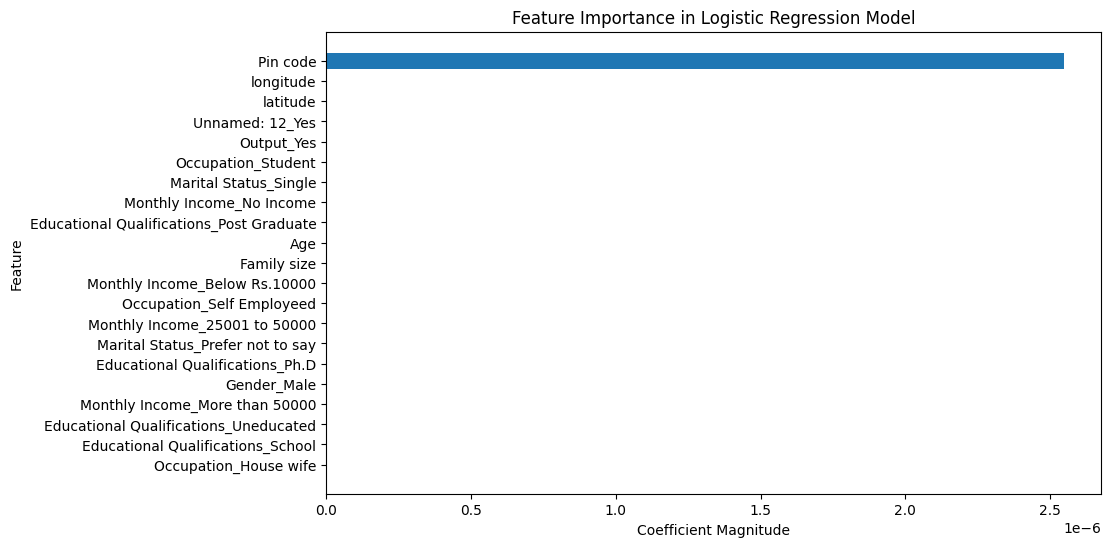

In [21]:
# Get feature importance (coefficients) from the logistic regression model
feature_importance = logistic_model.coef_[0]

# Get the names of the features
feature_names = X_encoded.columns

# Sort feature importance and feature names based on the absolute value of coefficients
sorted_indices = np.argsort(np.abs(feature_importance))
sorted_feature_importance = feature_importance[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names, sorted_feature_importance)
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature')
plt.title('Feature Importance in Logistic Regression Model')
plt.show()


# 2. Prediction Insights

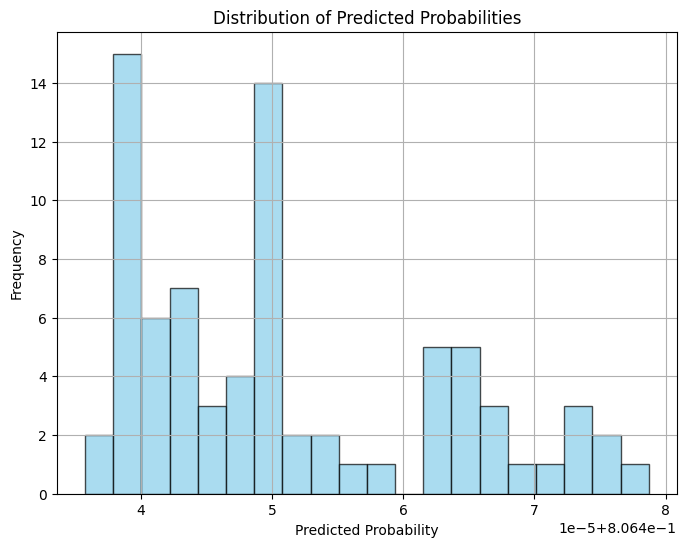

In [22]:
# Get predicted probabilities for the positive class (assuming 'Positive' is the positive class)
y_pred_proba = logistic_model.predict_proba(X_test_encoded)[:, 1]

# Plot histogram of predicted probabilities
plt.figure(figsize=(8, 6))
plt.hist(y_pred_proba, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Probabilities')
plt.grid(True)
plt.show()
